In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

In [3]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [4]:
%cd /work/eay/MITgcm_data/Experiment26/
Saltf = nc.Dataset('Salt.nc')
Uf    = nc.Dataset('U.nc'); 
Vf    = nc.Dataset('V.nc')
xq   = (Saltf.variables['X'][:])
yq   = (Saltf.variables['Y'][:])
zl   = (Saltf.variables['Z'][:])
Time = (Saltf.variables['T'][:])


%cd /work/eay/MITgcm_data/

/work2/eay/MITgcm_data/Experiment26
/work2/eay/MITgcm_data


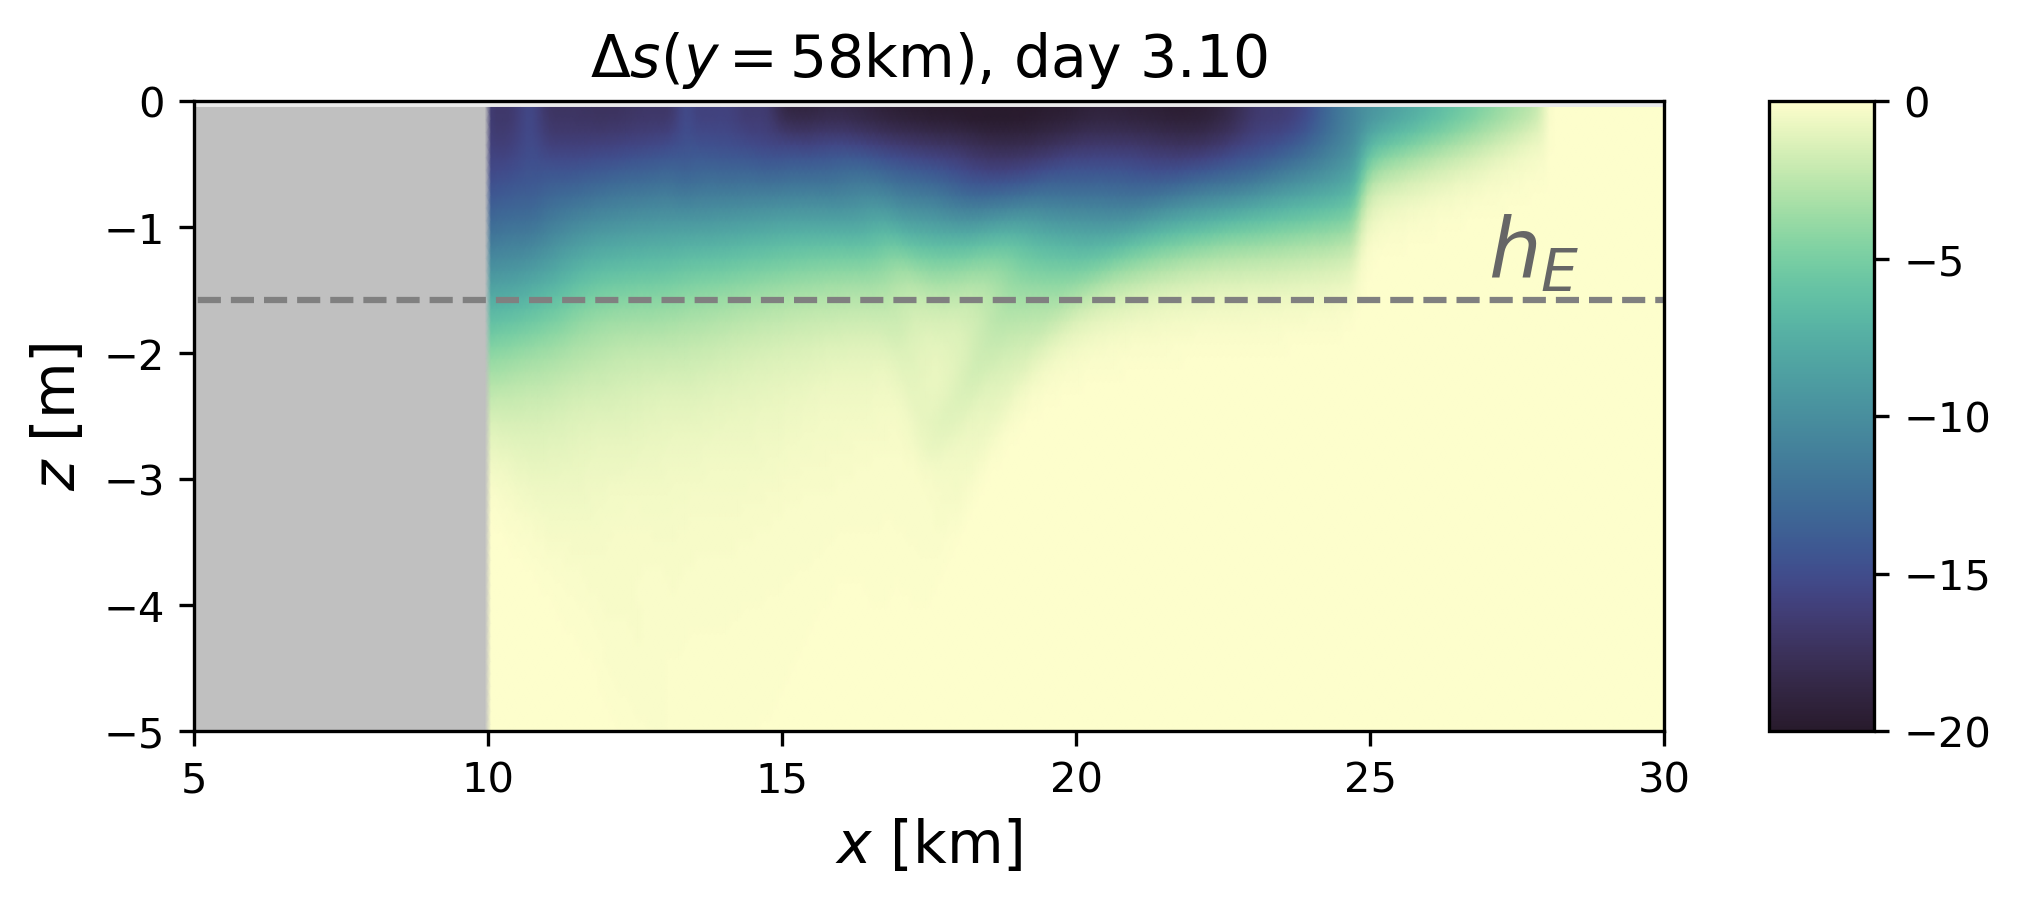

In [7]:
#Plotting salinity transect
index = 149
Salt = Saltf.variables['S'][index,:,:,:]
mask = Saltf.variables['S'][30,:,:,:]
Salt[mask==0]=np.nan
#Salt[Salt>=34]=34
Salt.shape
ekman_depth = (2*1e-4/(8e-5))**0.5
fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

#current_cmap = plt.cm.get_cmap("cubehelix").copy()
current_cmap = plt.cm.get_cmap(cmocean.cm.deep_r).copy()
current_cmap.set_bad(color='silver')
quad1 = ax1.pcolormesh(xq/1000,zl,(Salt[:,580,:]-34.),cmap=current_cmap,vmin=-20,vmax=0.,shading='gouraud')

ax1.plot([0,60],[-ekman_depth,-ekman_depth],'--',color=[.5,.5,.5])
ax1.text(27,-1.4,'$h_E$',fontsize=20,color=[.4,.4,.4])
ax1.set_ylim(-5,0)
ax1.set_xlim(5,30)


ax1.set_title('$\Delta s(y=58$km), day %04.2f' %(index/48.), fontsize=14) # (5 discharge cycles) 
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)
#plt.title('(psu)', fontsize=14)

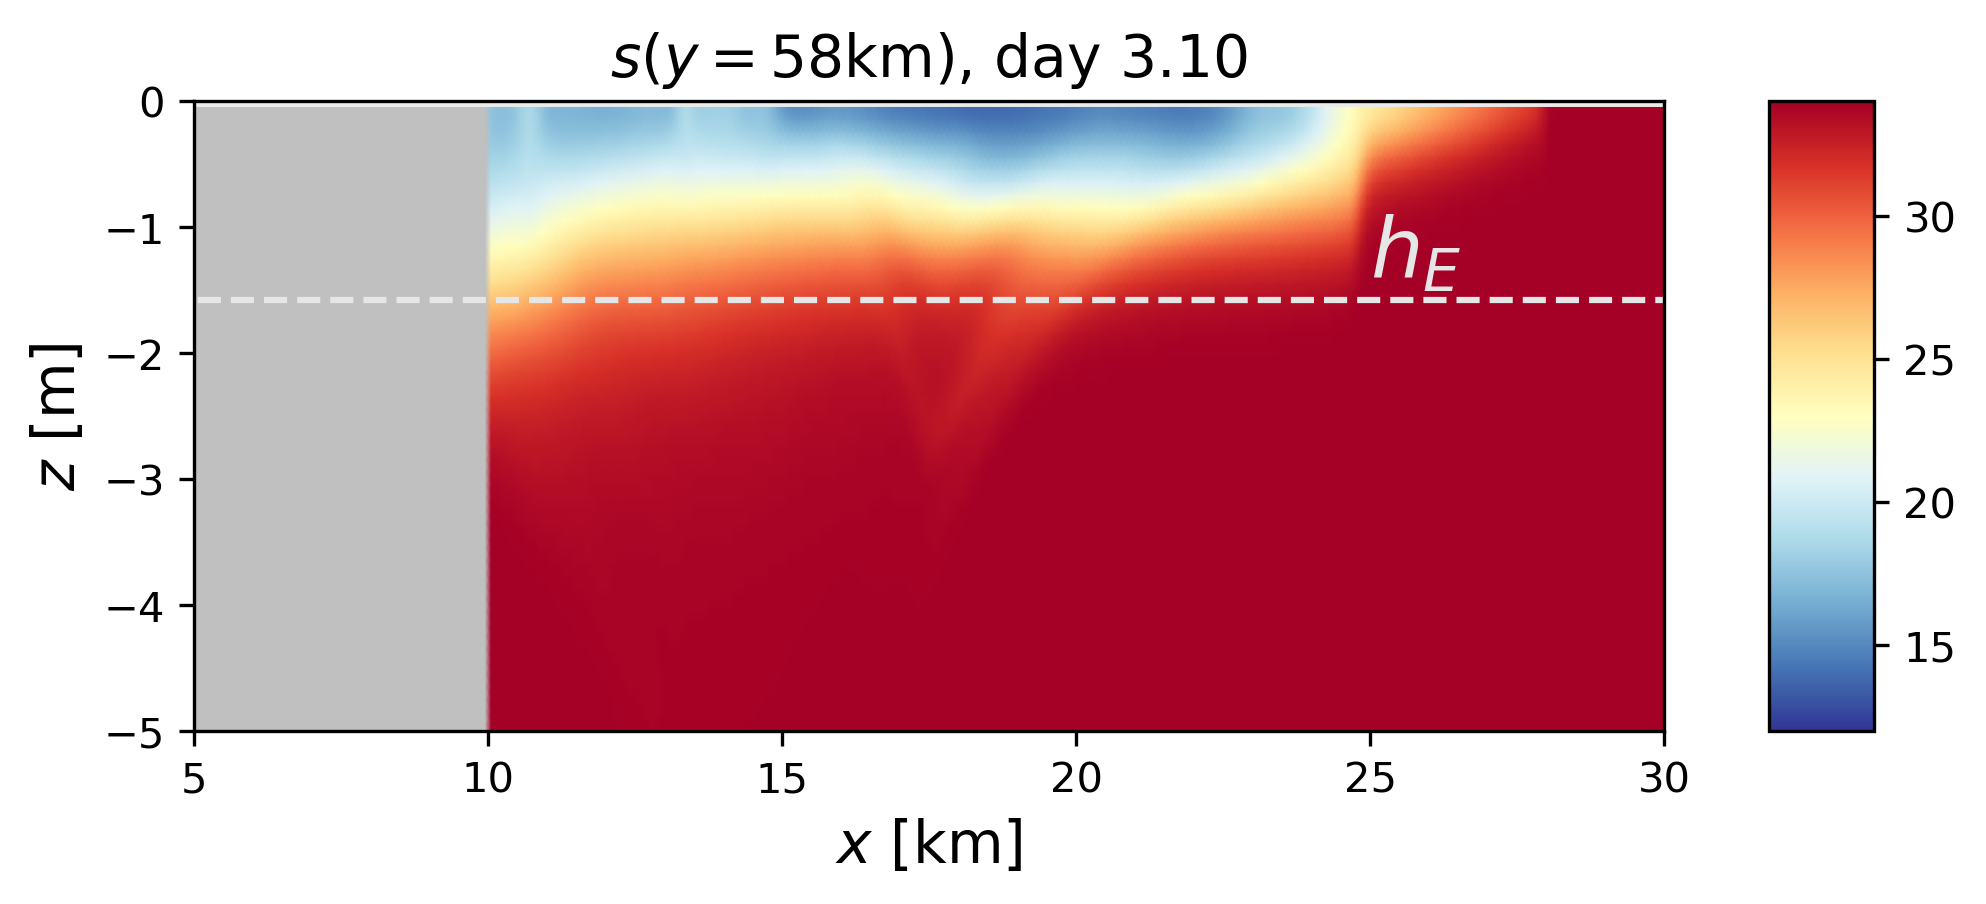

In [8]:
index = 149
Salt = Saltf.variables['S'][index,:,:,:]
mask = Saltf.variables['S'][30,:,:,:]
Salt[mask==0]=np.nan
#Salt[Salt>=34]=34
Salt.shape
fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

current_cmap = plt.cm.get_cmap("RdYlBu_r").copy()
current_cmap.set_bad(color='silver')
quad1 = ax1.pcolormesh(xq/1000,zl,(Salt[:,580,:]),cmap=current_cmap,vmin=12.,vmax=34.,shading='gouraud')
#quad1.cmap.set_over('silver')


ax1.plot([0,60],[-ekman_depth,-ekman_depth],'--',color=[.9,.9,.9])
#quad1.cmap.set_over('')
ax1.text(25,-1.4,'$h_E$',fontsize=20,color=[.9,.9,.9])
ax1.set_ylim(-5,0)
ax1.set_xlim(5,30)


ax1.set_title('$s(y=58$km), day %04.2f' %(index/48.), fontsize=14) # (5 discharge cycles) 
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)
#plt.title('(psu)', fontsize=14)

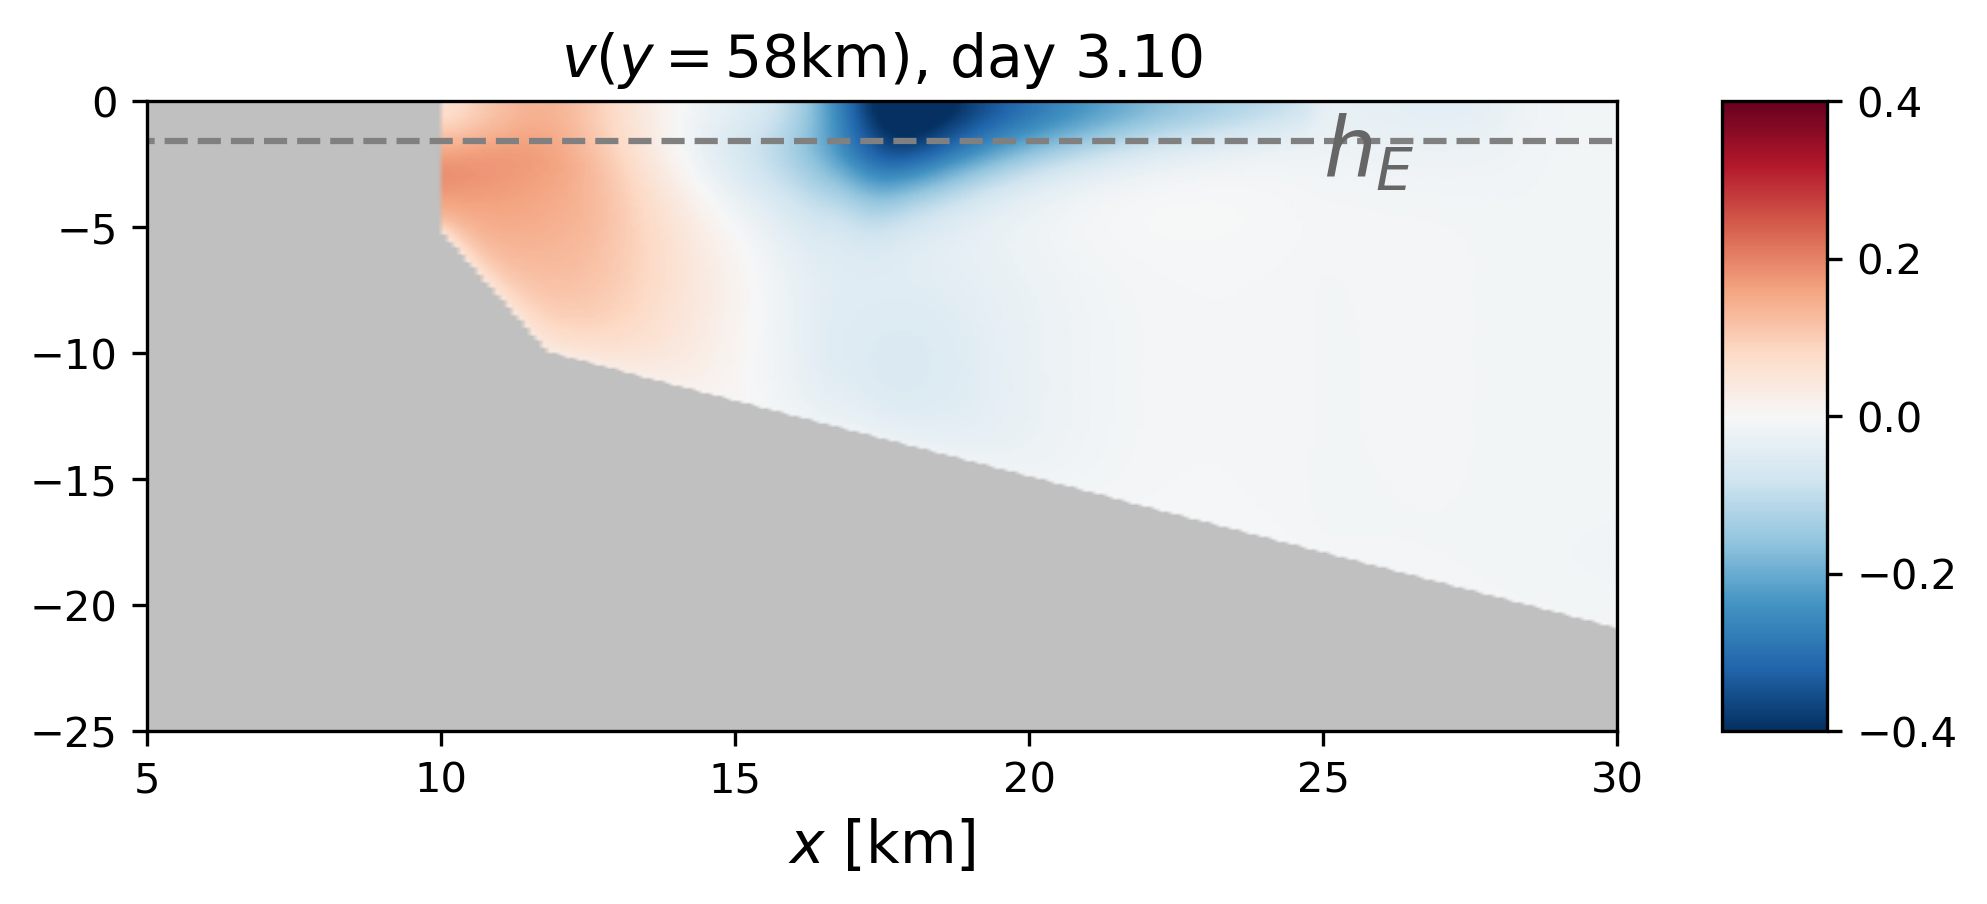

In [9]:
index = 149
V = Vf.variables['V'][index,:,:,:][:,:-1,:]
mask = Saltf.variables['S'][30,:,:,:]
V[mask==0]=np.nan

fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

current_cmap = plt.cm.get_cmap("RdBu_r").copy()
current_cmap.set_bad(color='silver')
quad1 = ax1.pcolormesh(xq/1000,zl,(V[:,580,:]),cmap=current_cmap,vmin=-.4,vmax=.4,shading='gouraud')

ax1.plot([0,60],[-ekman_depth,-ekman_depth],'--',color=[.5,.5,.5])
ax1.text(25,-3,'$h_E$',fontsize=20,color=[.4,.4,.4])

ax1.set_ylim(-25,0)
ax1.set_xlim(5,30)


ax1.set_title('$v(y=58$km), day %04.2f' %(index/48.), fontsize=14) # (5 discharge cycles) 
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
#ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)

In [10]:
## Computing geostrophic shear:
import xarray as xr
from gsw import sigma0, rho
%cd /work/eay/MITgcm_data/Experiment26/

# Temp = xr.open_dataset('Temp.nc')['Temp'][-1,:,500:600,:].mean('Y')
# Salt = xr.open_dataset('Salt.nc')['S'][-1,:,500:600,:].mean('Y')
# Density = rho(Salt, Temp,0)
# V    = xr.open_dataset('V.nc')['V'][-1,:,500:600,:].mean('Yp1')

Temp = xr.open_dataset('Temp.nc')['Temp'][-1,:,580,:]
Salt = xr.open_dataset('Salt.nc')['S'][-1,:,580,:]
Density = rho(Salt, Temp,0)
V    = xr.open_dataset('V.nc')['V'][-1,:,580,:]

f=8.e-5;
rho_0=1024;
g = 9.8;
%cd /work/eay/MITgcm_data/

dvg_dz = (-g/(f*rho_0))*Density.differentiate('X')
dv_dz = V.differentiate('Z')
ageostrophic = dv_dz - dvg_dz

dvg_dz=dvg_dz.where(Salt>0)
dv_dz=dv_dz.where(Salt>0)
ageostrophic=ageostrophic.where(Salt>0)

drhodx = Density.differentiate('X')
drhodz = Density.differentiate('Z')
dv_dx = V.differentiate('X')

EPV=(g/rho_0)*(drhodx*dv_dz)-(g/rho_0)*drhodz*(dv_dx+f)
EPV=EPV.where(Salt>0)

/work2/eay/MITgcm_data/Experiment26
/work2/eay/MITgcm_data


In [11]:
# index = 149
# V = Vf.variables['V'][index,:,:,:][:,:-1,:]
# mask = Saltf.variables['S'][30,:,:,:]
# V[mask==0]=np.nan

# fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
# ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

# current_cmap = plt.cm.get_cmap("RdBu_r").copy()
# current_cmap.set_bad(color='silver')
# quad1 = ax1.pcolormesh(xq/1000,zl,dvg_dz,cmap=current_cmap,vmin=-.2,vmax=.2,shading='gouraud')

# ax1.plot([0,60],[-ekman_depth,-ekman_depth],'--',color=[.5,.5,.5])
# ax1.text(25,-3,'$h_E$',fontsize=20,color=[.4,.4,.4])

# ax1.set_ylim(-25,0)
# ax1.set_xlim(5,30)


# ax1.set_title('$\partial V_g/\partial z(y=58$km), day %04.2f' %(index/48.), fontsize=14) # (5 discharge cycles) 
# #ax1.set_aspect('equal')
# ax1.set_facecolor((0.92, 0.92, 0.92))
# ax1.set_xlabel('$x$ [km]',fontsize=14)
# ax1.set_ylabel('$z$ [m]',fontsize=14)

# cb1 = fig.colorbar(quad1,ax2)

In [12]:
# index = 149
# V = Vf.variables['V'][index,:,:,:][:,:-1,:]
# mask = Saltf.variables['S'][30,:,:,:]
# V[mask==0]=np.nan

# fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
# ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

# current_cmap = plt.cm.get_cmap("RdBu_r").copy()
# current_cmap.set_bad(color='silver')
# quad1 = ax1.pcolormesh(xq/1000,zl,dv_dz,cmap=current_cmap,vmin=-.1,vmax=.1,shading='gouraud')


# ax1.set_ylim(-25,0)
# ax1.set_xlim(5,30)


# ax1.set_title('$\partial V/\partial z(y=58$km), day %04.2f' %(index/48.), fontsize=14) # (5 discharge cycles) 
# #ax1.set_aspect('equal')
# ax1.set_facecolor((0.92, 0.92, 0.92))
# ax1.set_xlabel('$x$ [km]',fontsize=14)
# #ax1.set_ylabel('$z$ [m]',fontsize=14)

# cb1 = fig.colorbar(quad1,ax2)

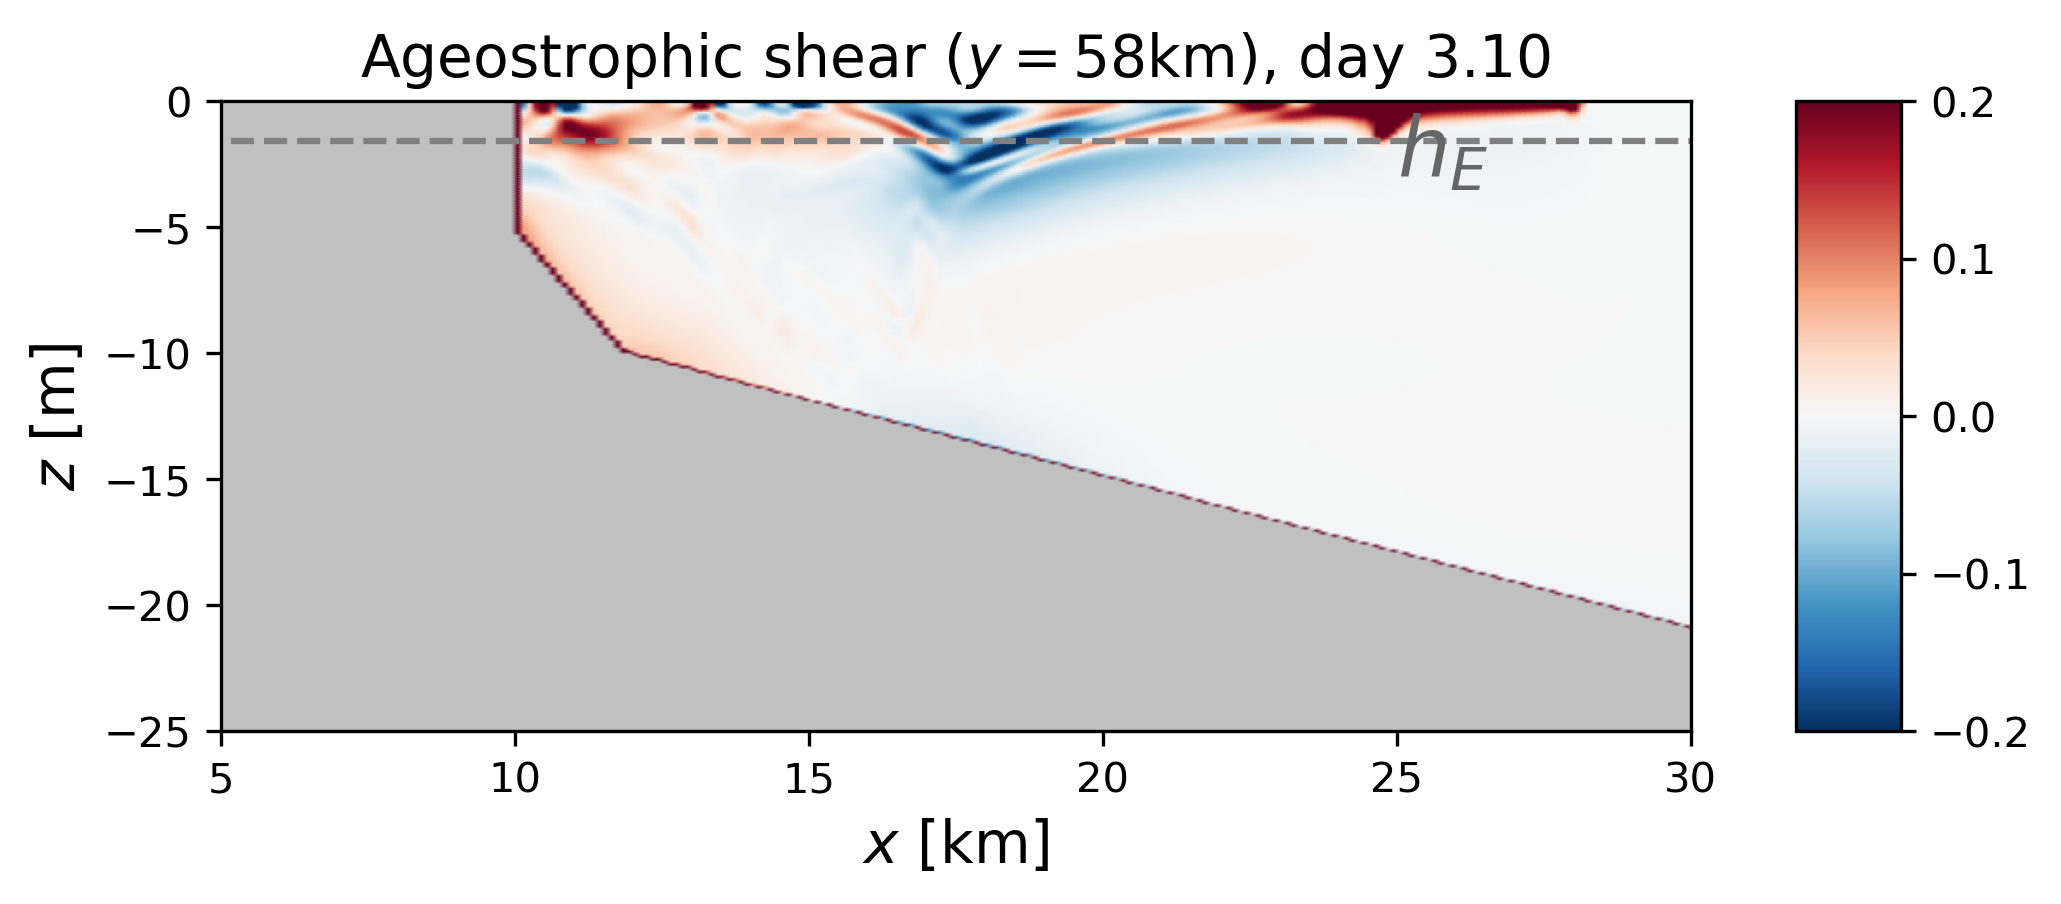

In [13]:
index = 149
V = Vf.variables['V'][index,:,:,:][:,:-1,:]
mask = Saltf.variables['S'][30,:,:,:]
V[mask==0]=np.nan

fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

current_cmap = plt.cm.get_cmap("RdBu_r").copy()
current_cmap.set_bad(color='silver')
quad1 = ax1.pcolormesh(xq/1000,zl,ageostrophic,cmap=current_cmap,vmin=-.2,vmax=.2,shading='gouraud')
ax1.plot([0,60],[-ekman_depth,-ekman_depth],'--',color=[.5,.5,.5])
ax1.text(25,-3,'$h_E$',fontsize=20,color=[.4,.4,.4])


ax1.set_ylim(-25,0)
ax1.set_xlim(5,30)


ax1.set_title('Ageostrophic shear $(y=58$km), day %04.2f' %(index/48.), fontsize=14) # (5 discharge cycles) 
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)

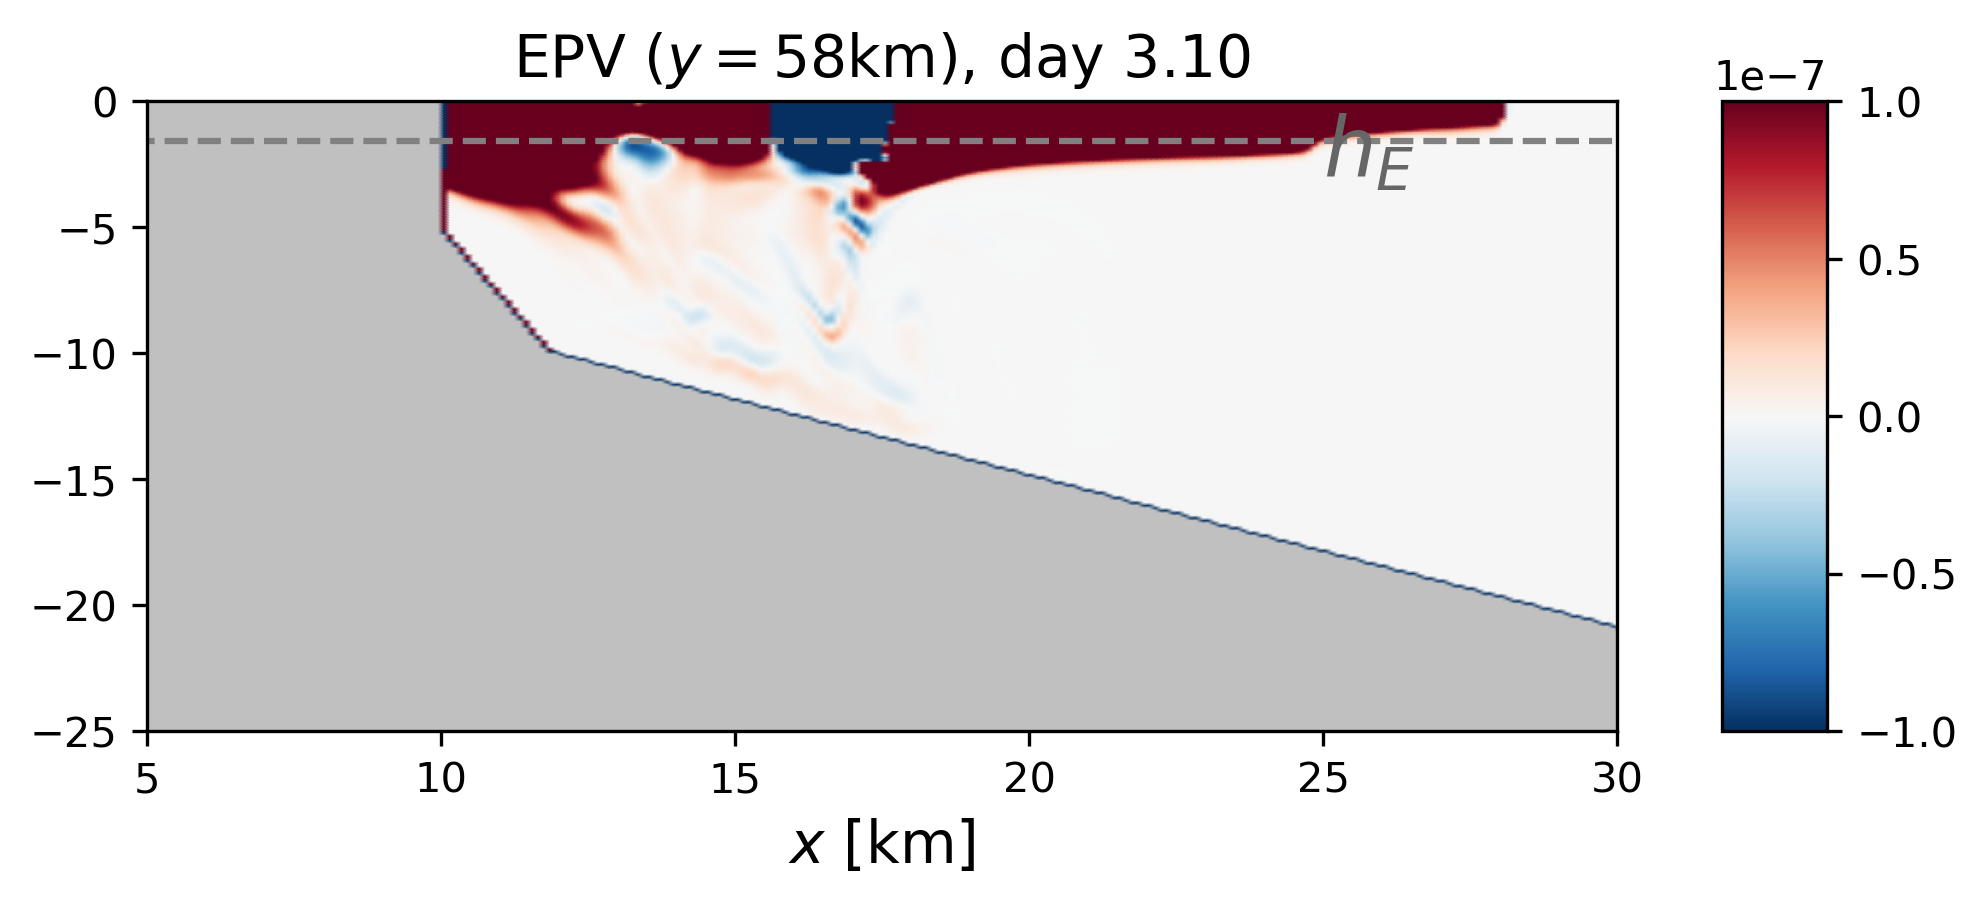

In [19]:
index = 149

fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

#current_cmap = plt.cm.get_cmap("RdBu_r").copy()

current_cmap = plt.cm.get_cmap("bwr").copy()
current_cmap.set_bad(color='silver')
quad1 = ax1.pcolormesh(xq/1000,zl,EPV,cmap=current_cmap,vmin=-1e-7,vmax=1e-7,shading='gouraud')
ax1.plot([0,60],[-ekman_depth,-ekman_depth],'--',color=[.5,.5,.5])
ax1.text(25,-3,'$h_E$',fontsize=20,color=[.4,.4,.4])


ax1.set_ylim(-25,0)
ax1.set_xlim(5,30)


ax1.set_title('EPV $(y=58$km), day %04.2f' %(index/48.), fontsize=14) # (5 discharge cycles) 
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
#ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)